In [ ]:
# MemorySafe Labs — Taste Demo v2
import os

REPO_URL = "https://github.com/MemorySafe-Labs/memorysafe.git"
REPO_DIR = "/content/memorysafe"

if not os.path.exists(REPO_DIR):
    !git clone --depth 1 {REPO_URL} {REPO_DIR}
else:
    print("Repo already exists:", REPO_DIR)

os.chdir(REPO_DIR)
print("CWD:", os.getcwd())

!pip -q install numpy matplotlib


Repo already exists: /content/memorysafe
CWD: /content/memorysafe


In [ ]:
import os
demo_dir = "benchmarks/Taste_demo_v2"
assert os.path.isdir(demo_dir), f"Missing {demo_dir}"
print("Demo files:", os.listdir(demo_dir))


Demo files: ['README.md', 'baselines.py', 'plot_governance.py', 'simulate_stream.py', 'memorysafe_buffer.py', 'Taste_demo_v2', '__pycache__', 'demo.ipynb']


In [ ]:
import os, time
os.makedirs("benchmarks/Taste_demo_v2/_runs", exist_ok=True)

STEPS = 800
CAPACITY = 500
SEED = 7

def run_and_save(policy):
    outfile = f"benchmarks/Taste_demo_v2/_runs/{policy}_steps{STEPS}_cap{CAPACITY}_seed{SEED}.jsonl"
    cmd = f"python benchmarks/Taste_demo_v2/simulate_stream.py --policy {policy} --steps {STEPS} --capacity {CAPACITY} --seed {SEED}"
    print("Running:", cmd)
    print("Saving to:", outfile)

    !bash -lc "{cmd} | tee {outfile}"
    return outfile

logs = {}
for p in ["fifo", "reservoir", "random_replay", "memorysafe"]:
    logs[p] = run_and_save(p)

logs


Running: python benchmarks/Taste_demo_v2/simulate_stream.py --policy fifo --steps 800 --capacity 500 --seed 7
Saving to: benchmarks/Taste_demo_v2/_runs/fifo_steps800_cap500_seed7.jsonl
[fifo] step=100 recall_pos=0.031 f1_pos=0.049 buf=100 pos_frac=0.05 mvi_mean=0.000 prot=0 forgot=0 repl=0 evict=0 (buf_before=99 buf_after=100)
[fifo] step=200 recall_pos=0.008 f1_pos=0.014 buf=200 pos_frac=0.06 mvi_mean=0.000 prot=0 forgot=0 repl=0 evict=0 (buf_before=199 buf_after=200)
[fifo] step=300 recall_pos=0.000 f1_pos=0.000 buf=300 pos_frac=0.07 mvi_mean=0.000 prot=0 forgot=0 repl=0 evict=0 (buf_before=299 buf_after=300)
[fifo] step=400 recall_pos=0.000 f1_pos=0.000 buf=400 pos_frac=0.07 mvi_mean=0.000 prot=0 forgot=0 repl=0 evict=0 (buf_before=399 buf_after=400)
[fifo] step=500 recall_pos=0.000 f1_pos=0.000 buf=500 pos_frac=0.08 mvi_mean=0.000 prot=0 forgot=0 repl=0 evict=0 (buf_before=499 buf_after=500)
[fifo] step=600 recall_pos=0.000 f1_pos=0.000 buf=500 pos_frac=0.09 mvi_mean=0.000 prot=0 f

{'fifo': 'benchmarks/Taste_demo_v2/_runs/fifo_steps800_cap500_seed7.jsonl',
 'reservoir': 'benchmarks/Taste_demo_v2/_runs/reservoir_steps800_cap500_seed7.jsonl',
 'random_replay': 'benchmarks/Taste_demo_v2/_runs/random_replay_steps800_cap500_seed7.jsonl',
 'memorysafe': 'benchmarks/Taste_demo_v2/_runs/memorysafe_steps800_cap500_seed7.jsonl'}

In [ ]:
!ls -lah benchmarks/Taste_demo_v2/_runs


total 24K
drwxr-xr-x 2 root root 4.0K Feb 10 14:23 .
drwxr-xr-x 5 root root 4.0K Feb 10 14:23 ..
-rw-r--r-- 1 root root 1.3K Feb 10 14:23 fifo_steps800_cap500_seed7.jsonl
-rw-r--r-- 1 root root 1.3K Feb 10 14:23 memorysafe_steps800_cap500_seed7.jsonl
-rw-r--r-- 1 root root 1.3K Feb 10 14:23 random_replay_steps800_cap500_seed7.jsonl
-rw-r--r-- 1 root root 1.3K Feb 10 14:23 reservoir_steps800_cap500_seed7.jsonl


In [ ]:
import subprocess, sys

# tenta plotar o MemorySafe, por exemplo
logfile = logs["memorysafe"]
cmd = [sys.executable, "benchmarks/Taste_demo_v2/plot_governance.py", "--logfile", logfile]
print("Running:", " ".join(cmd))
subprocess.run(cmd, check=False)


Running: /usr/bin/python3 benchmarks/Taste_demo_v2/plot_governance.py --logfile benchmarks/Taste_demo_v2/_runs/memorysafe_steps800_cap500_seed7.jsonl


CompletedProcess(args=['/usr/bin/python3', 'benchmarks/Taste_demo_v2/plot_governance.py', '--logfile', 'benchmarks/Taste_demo_v2/_runs/memorysafe_steps800_cap500_seed7.jsonl'], returncode=2)

In [ ]:
!python benchmarks/Taste_demo_v2/plot_governance.py --help


usage: plot_governance.py [-h] logfile

positional arguments:
  logfile     Path to runs/*.jsonl (e.g., runs/latest.jsonl)

options:
  -h, --help  show this help message and exit


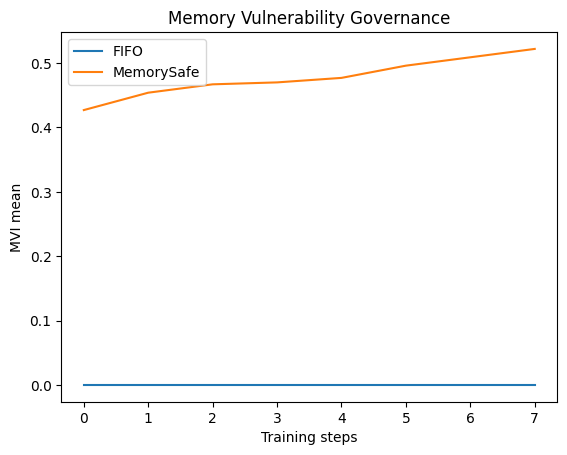

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

def extract_metric(path):
    vals = []
    with open(path) as f:
        for line in f:
            m = re.search(r"mvi_mean=([0-9.]+)", line)
            if m:
                vals.append(float(m.group(1)))
    return vals

fifo_vals = extract_metric(logs["fifo"])
mem_vals = extract_metric(logs["memorysafe"])

n = min(len(fifo_vals), len(mem_vals))
x = np.arange(n)

plt.figure()
plt.plot(x, fifo_vals[:n], label="FIFO")
plt.plot(x, mem_vals[:n], label="MemorySafe")
plt.title("Memory Vulnerability Governance")
plt.xlabel("Training steps")
plt.ylabel("MVI mean")
plt.legend()
plt.show()


In [ ]:
print("✅ Demo finished. (Run-all ready)")


✅ Demo finished. (Run-all ready)
